We need to present a strategic recommendation to Julia that is supported by data which she can then use for the upcoming category review however to do so we need to analyse the data to understand the current purchasing trends and behaviours. The client is particularly interested in customer segments and their chip purchasing behaviour. Consider what metrics would help describe the customers’ purchasing behaviour.  

Begin performing high level data checks such as:

- Creating and interpreting high level summaries of the data
- Finding outliers and removing these (if applicable)
- Checking data formats and correcting (if applicable)


In [ ]:
# Import important modules

import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


DATA EXPLORATION

In [ ]:
purchase = pd.read_csv("/content/drive/My Drive/QVI_purchase_behaviour.csv")
purchase

LYLTY_CARD_NBR               LIFESTAGE PREMIUM_CUSTOMER
0                1000   YOUNG SINGLES/COUPLES          Premium
1                1002   YOUNG SINGLES/COUPLES       Mainstream
2                1003          YOUNG FAMILIES           Budget
3                1004   OLDER SINGLES/COUPLES       Mainstream
4                1005  MIDAGE SINGLES/COUPLES       Mainstream
...               ...                     ...              ...
72632         2370651  MIDAGE SINGLES/COUPLES       Mainstream
72633         2370701          YOUNG FAMILIES       Mainstream
72634         2370751          YOUNG FAMILIES          Premium
72635         2370961          OLDER FAMILIES           Budget
72636         2373711   YOUNG SINGLES/COUPLES       Mainstream

[72637 rows x 3 columns]

In [ ]:
purchase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [ ]:
purchase.describe(include = "all")

LYLTY_CARD_NBR LIFESTAGE PREMIUM_CUSTOMER
count     7.263700e+04     72637            72637
unique             NaN         7                3
top                NaN  RETIREES       Mainstream
freq               NaN     14805            29245
mean      1.361859e+05       NaN              NaN
std       8.989293e+04       NaN              NaN
min       1.000000e+03       NaN              NaN
25%       6.620200e+04       NaN              NaN
50%       1.340400e+05       NaN              NaN
75%       2.033750e+05       NaN              NaN
max       2.373711e+06       NaN              NaN

In [ ]:
purchase.isnull().any()

LYLTY_CARD_NBR      False
LIFESTAGE           False
PREMIUM_CUSTOMER    False
dtype: bool

In [ ]:
transaction = pd.read_excel("/content/drive/My Drive/QVI_transaction_data.xlsx")
transaction

DATE  STORE_NBR  ...  PROD_QTY  TOT_SALES
0       43390          1  ...         2        6.0
1       43599          1  ...         3        6.3
2       43605          1  ...         2        2.9
3       43329          2  ...         5       15.0
4       43330          2  ...         3       13.8
...       ...        ...  ...       ...        ...
264831  43533        272  ...         2       10.8
264832  43325        272  ...         1        4.4
264833  43410        272  ...         2        8.8
264834  43461        272  ...         2        7.8
264835  43365        272  ...         2        8.8

[264836 rows x 8 columns]

In [ ]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [ ]:
transaction.describe(include = "all")

DATE     STORE_NBR  ...       PROD_QTY      TOT_SALES
count   264836.000000  264836.00000  ...  264836.000000  264836.000000
unique            NaN           NaN  ...            NaN            NaN
top               NaN           NaN  ...            NaN            NaN
freq              NaN           NaN  ...            NaN            NaN
mean     43464.036260     135.08011  ...       1.907309       7.304200
std        105.389282      76.78418  ...       0.643654       3.083226
min      43282.000000       1.00000  ...       1.000000       1.500000
25%      43373.000000      70.00000  ...       2.000000       5.400000
50%      43464.000000     130.00000  ...       2.000000       7.400000
75%      43555.000000     203.00000  ...       2.000000       9.200000
max      43646.000000     272.00000  ...     200.000000     650.000000

[11 rows x 8 columns]

In [ ]:
transaction.isnull().any()

DATE              False
STORE_NBR         False
LYLTY_CARD_NBR    False
TXN_ID            False
PROD_NBR          False
PROD_NAME         False
PROD_QTY          False
TOT_SALES         False
dtype: bool

**OBSERVATION**
- Date column in the dataset is stored as integer type 
- Date must be converted into datetime format
- The data in Store Number (STORE_NBR), Loyalty Card Number (LYLTY_CARD_NBR), Transaction ID(TXN_ID), Production Number(PROD_NBR) are numeric but they represent nominal data
- Better quantitative data representation exist in Total Sales(TOT_SALES), and Production Quantity(PROD_QTY)
- Join column in both the datasets is customer's Loyalty Card Number
- No nulls in both the datasets

**Datetime Conversion**

In [ ]:
from datetime import datetime as dt

transaction["DATE"] = (transaction["DATE"].apply(lambda date: dt.fromordinal(dt(1900, 1, 1).toordinal() + date - 2)))
transaction

DATE  STORE_NBR  ...  PROD_QTY  TOT_SALES
0      2018-10-17          1  ...         2        6.0
1      2019-05-14          1  ...         3        6.3
2      2019-05-20          1  ...         2        2.9
3      2018-08-17          2  ...         5       15.0
4      2018-08-18          2  ...         3       13.8
...           ...        ...  ...       ...        ...
264831 2019-03-09        272  ...         2       10.8
264832 2018-08-13        272  ...         1        4.4
264833 2018-11-06        272  ...         2        8.8
264834 2018-12-27        272  ...         2        7.8
264835 2018-09-22        272  ...         2        8.8

[264836 rows x 8 columns]

A bit of Data Cleaning for transaction data

In [ ]:
transaction['PROD_NAME'] = transaction['PROD_NAME'].str.replace('\W', ' ')
transaction['PROD_NAME']  = transaction['PROD_NAME'] .map(lambda x: str(x)[:-1])
transaction['PROD_NAME'] = transaction['PROD_NAME'].str.lower()
transaction

DATE  STORE_NBR  ...  PROD_QTY  TOT_SALES
0      2018-10-17          1  ...         2        6.0
1      2019-05-14          1  ...         3        6.3
2      2019-05-20          1  ...         2        2.9
3      2018-08-17          2  ...         5       15.0
4      2018-08-18          2  ...         3       13.8
...           ...        ...  ...       ...        ...
264831 2019-03-09        272  ...         2       10.8
264832 2018-08-13        272  ...         1        4.4
264833 2018-11-06        272  ...         2        8.8
264834 2018-12-27        272  ...         2        7.8
264835 2018-09-22        272  ...         2        8.8

[264836 rows x 8 columns]

In [ ]:
transaction["PACK_SIZE"] = transaction["PROD_NAME"].str.extract(pat = "(\d+)")
transaction["PACK_SIZE"] = transaction["PACK_SIZE"].str.strip().str.lower().astype(int)

In [ ]:
transaction['PROD_NAME'] =transaction['PROD_NAME'] .str.replace('\d+','')
transaction

DATE  STORE_NBR  LYLTY_CARD_NBR  ...  PROD_QTY  TOT_SALES PACK_SIZE
0      2018-10-17          1            1000  ...         2        6.0       175
1      2019-05-14          1            1307  ...         3        6.3       175
2      2019-05-20          1            1343  ...         2        2.9       170
3      2018-08-17          2            2373  ...         5       15.0       175
4      2018-08-18          2            2426  ...         3       13.8       150
...           ...        ...             ...  ...       ...        ...       ...
264831 2019-03-09        272          272319  ...         2       10.8       175
264832 2018-08-13        272          272358  ...         1        4.4       175
264833 2018-11-06        272          272379  ...         2        8.8       170
264834 2018-12-27        272          272379  ...         2        7.8       150
264835 2018-09-22        272          272380  ...         2        8.8       175

[264836 rows x 9 columns]

In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

cleanProdName = transaction['PROD_NAME']
string = ''.join(cleanProdName)
prodWord = word_tokenize(string)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
from nltk.probability import FreqDist as fdist

wordFrequency = fdist(prodWord)
freq_df = pd.DataFrame(list(wordFrequency.items()), columns = ["Word", "Frequency"]).sort_values(by = 'Frequency', ascending = False)
freq_df

Word  Frequency
9          chips      49770
15        kettle      38851
5         cheese      27890
6         smiths      26969
27          salt      24719
..           ...        ...
358  chcknburger          8
406  creaminfzns          8
362   salgrnwves          8
424   htsunbites          8
426  salsunbites          5

[427 rows x 2 columns]

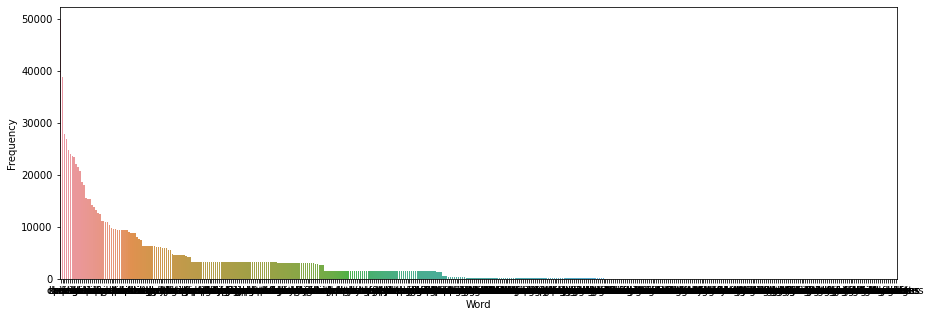

In [ ]:
plt.figure(figsize = (15,5))
sns.barplot(x = 'Word', y ='Frequency', data = freq_df)

In [ ]:
transaction = transaction[~transaction['PROD_NAME'].str.contains("salsa")]
transaction['PROD_NAME'] = transaction['PROD_NAME'].apply(lambda x: x.title())

In [ ]:
transaction

DATE  STORE_NBR  LYLTY_CARD_NBR  ...  PROD_QTY  TOT_SALES PACK_SIZE
0      2018-10-17          1            1000  ...         2        6.0       175
1      2019-05-14          1            1307  ...         3        6.3       175
2      2019-05-20          1            1343  ...         2        2.9       170
3      2018-08-17          2            2373  ...         5       15.0       175
4      2018-08-18          2            2426  ...         3       13.8       150
...           ...        ...             ...  ...       ...        ...       ...
264831 2019-03-09        272          272319  ...         2       10.8       175
264832 2018-08-13        272          272358  ...         1        4.4       175
264833 2018-11-06        272          272379  ...         2        8.8       170
264834 2018-12-27        272          272379  ...         2        7.8       150
264835 2018-09-22        272          272380  ...         2        8.8       175

[246742 rows x 9 columns]

**Finding any outliers in the TRANSACTIONS DATA**

As these columns represent quantitative data, outliers have been identified for these two columns only.


In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows = 2, cols = 1, shared_xaxes = False)

fig.add_trace(go.Box(x = transaction["TOT_SALES"], marker = {"color" : px.colors.diverging.Portland[0]},
                     name = "Total Sales"), row = 1, col = 1)
fig.add_trace(go.Box(x = transaction["PROD_QTY"], marker = {"color" : px.colors.diverging.Portland[1]},
                     name = "Product Quantity"), row = 2, col = 1)

fig.update_layout(width = 900, height = 250, showlegend = False, 
                  title = "Outliers in Total Sales and Product Quantity",
                  font = {"size": 14})
fig.show()

- In prod quantity 200 is outlier and in total sales 650 is outlier

In [ ]:
transaction[transaction['TOT_SALES'] == transaction['TOT_SALES'].max()]

DATE  STORE_NBR  LYLTY_CARD_NBR  ...  PROD_QTY  TOT_SALES PACK_SIZE
69762 2018-08-19        226          226000  ...       200      650.0       380
69763 2019-05-20        226          226000  ...       200      650.0       380

[2 rows x 9 columns]

In [ ]:
# remove outliers
transaction = transaction.loc[transaction['TOT_SALES'] != transaction['TOT_SALES'].max()]

In [ ]:
fig = make_subplots(rows = 2, cols = 1, shared_xaxes = False)

fig.add_trace(go.Box(x = transaction["TOT_SALES"], marker = {"color" : px.colors.diverging.Portland[0]},
                     name = "Total Sales"), row = 1, col = 1)
fig.add_trace(go.Box(x = transaction["PROD_QTY"], marker = {"color" : px.colors.diverging.Portland[1]},
                     name = "Product Quantity"), row = 2, col = 1)

fig.update_layout(width = 900, height = 250, showlegend = False, 
                  title = "Outliers in Total Sales and Product Quantity",
                  font = {"size": 14})
fig.show()

In [ ]:
transaction['DATE'].nunique()

364

In [ ]:
# Look for the missing date 

pd.date_range(start = '2018-07-01', end = '2019-06-30').difference(transaction['DATE'])

DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq=None)

The missing date is in christmas, probably due to all stores closed on christmas eve

**THE TIME SERIES SALES GRAPH**

In [ ]:
tot_sales_df = (pd.pivot_table(data = transaction, index = ["DATE"], 
                               values = "TOT_SALES", aggfunc = np.sum).reset_index().round(2))


In [ ]:
fig = px.scatter(data_frame = tot_sales_df, 
                 x = "DATE", y = "TOT_SALES",
                 color = "TOT_SALES", size = "TOT_SALES", size_max = 12,
                 title = {"text": "Total Sales Trend for the Year for All Products", "font_size" : 20, "x" : 0.5},
                 labels = {"DATE": "Date", "TOT_SALES": "Total Sales"},
                 color_continuous_scale = px.colors.diverging.Portland, 
                )

fig.update_layout(xaxis_title = "Month-Year")
fig.show()

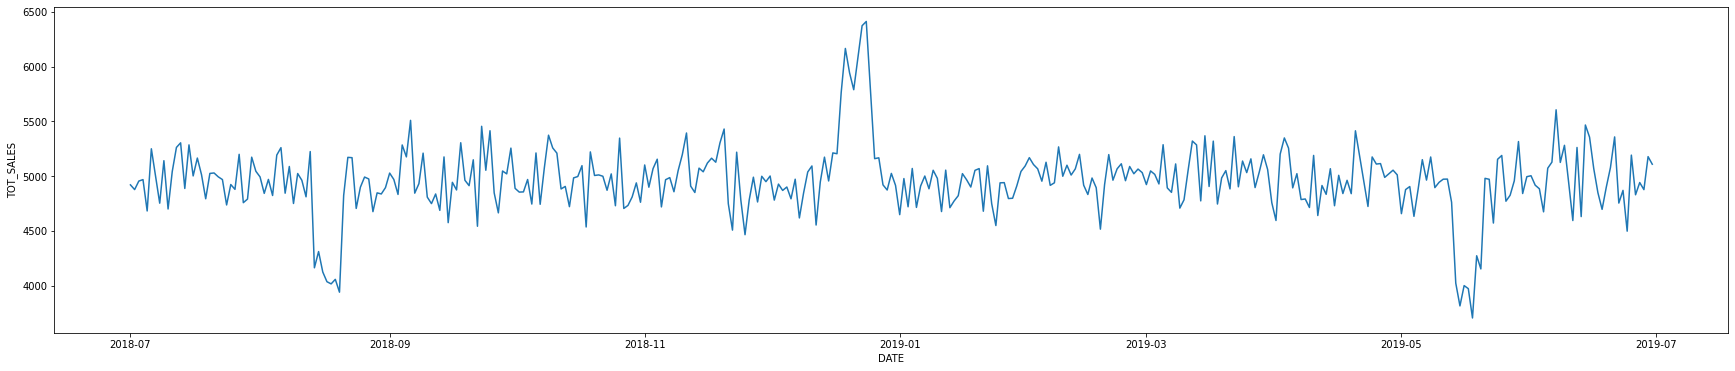

In [ ]:
sale_by_date = transaction.groupby('DATE')['TOT_SALES'].sum().reset_index()

plt.figure(figsize=(30,6))
start_date = '2017-12-31' 
end_date = '2019-12-31'

mask = (sale_by_date['DATE'] > start_date) & (sale_by_date['DATE'] <= end_date)

date_range = sale_by_date.loc[mask].sort_values(by ='DATE', ascending=True)

sns.lineplot(x = 'DATE', y='TOT_SALES', data = date_range, err_style='band',) 
plt.show()

- Max Sales happened in December 2018
- Lowest sales happened in the August 2018 and May 2019

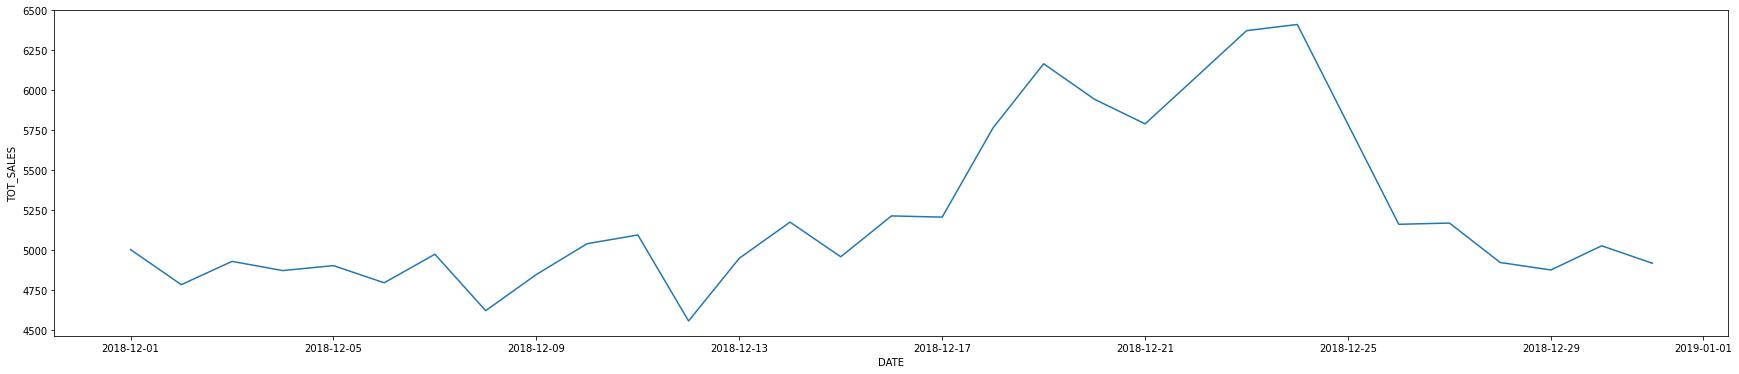

In [ ]:
# plot sales profile on December 2018
plt.figure(figsize=(30,6))
start_date_2 = '2018-11-30' 
end_date_2 = '2018-12-31'

mask_2 = (sale_by_date['DATE'] > start_date_2) & (sale_by_date['DATE'] <= end_date_2)

date_range_2 = sale_by_date.loc[mask_2].sort_values(by ='DATE', ascending=True)

sns.lineplot(x = 'DATE', y='TOT_SALES', data = date_range_2) 
plt.show()

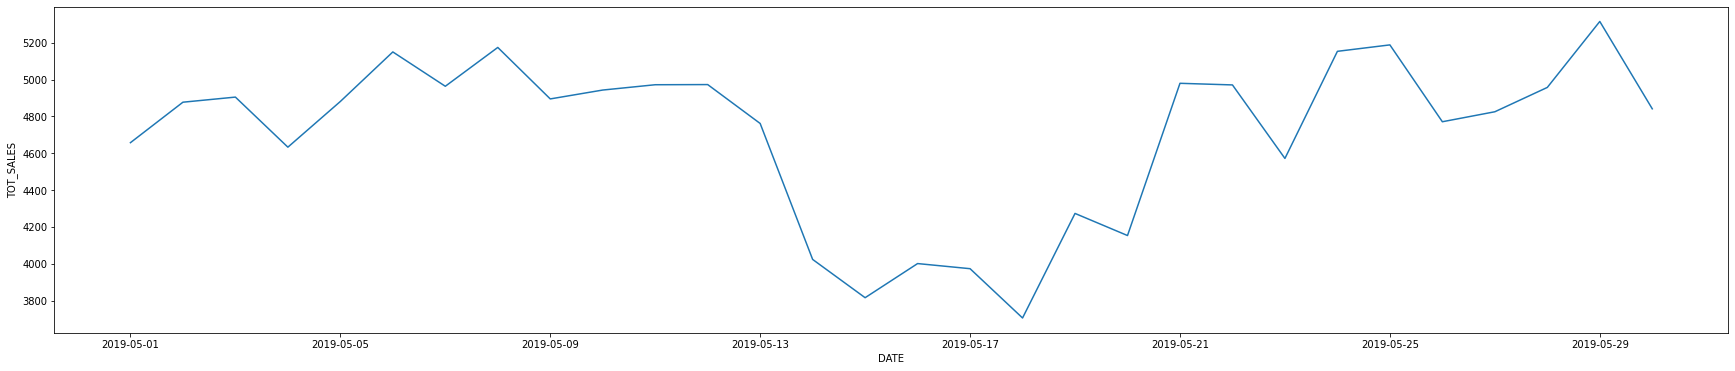

In [ ]:
# plot sales profile on May 2019
plt.figure(figsize=(30,6))
start_date_4 = '2019-4-30' 
end_date_4 = '2019-5-30'

mask_4 = (sale_by_date['DATE'] > start_date_4) & (sale_by_date['DATE'] <= end_date_4)

date_range_4 = sale_by_date.loc[mask_4].sort_values(by ='DATE', ascending=True)

sns.lineplot(x = 'DATE', y='TOT_SALES', data = date_range_4) 
plt.show()

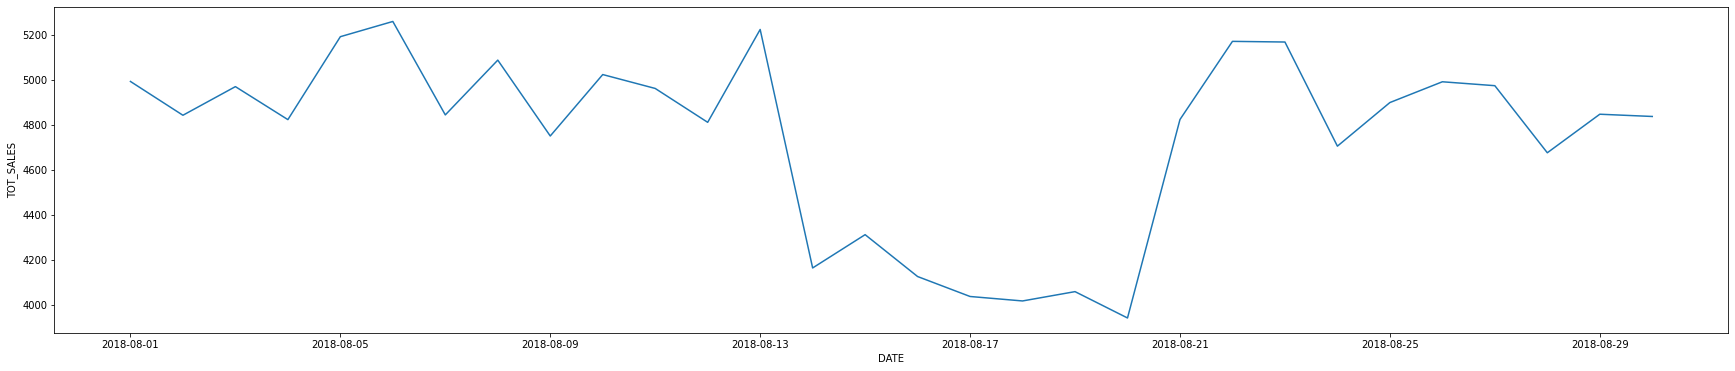

In [ ]:
# plot sales profile on August 2018
plt.figure(figsize=(30,6))
start_date_3 = '2018-7-31' 
end_date_3 = '2018-8-30'

mask_3 = (sale_by_date['DATE'] > start_date_3) & (sale_by_date['DATE'] <= end_date_3)

date_range_3 = sale_by_date.loc[mask_3].sort_values(by ='DATE', ascending=True)

sns.lineplot(x = 'DATE', y='TOT_SALES', data = date_range_3) 
plt.show()

**THE PACK SIZES DISTRIBUTION**

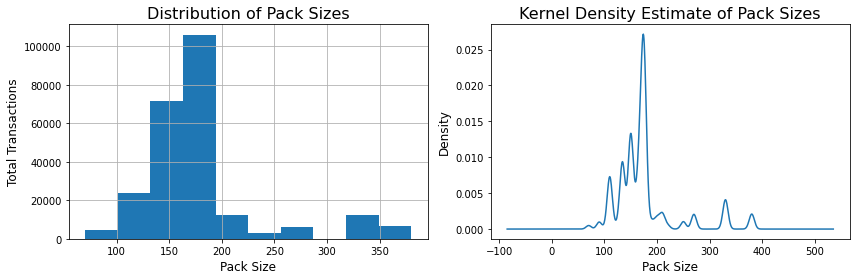

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 4))

transaction["PACK_SIZE"].hist( ax = ax1)
transaction["PACK_SIZE"].plot.kde( ax = ax2)

ax1.set_title("Distribution of Pack Sizes", size = 16)
ax1.set_xlabel("Pack Size", size = 12)
ax1.set_ylabel("Total Transactions", size = 12)

ax2.set_title("Kernel Density Estimate of Pack Sizes", size = 16)
ax2.set_xlabel("Pack Size", size = 12)
ax2.set_ylabel("Density", size = 12)

plt.tight_layout()
plt.show()

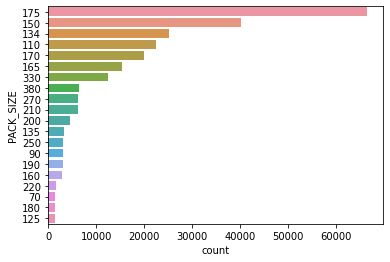

In [ ]:
sns.countplot(y = transaction['PACK_SIZE'], order = transaction['PACK_SIZE'].value_counts().index)

**THE BRAND NAMES DISTRIBUTION**

In [ ]:
print("Extracted brand names:")

for each_brand in transaction["PROD_NAME"].str.split().str[0].value_counts(dropna = False).sort_index().index:
    print(each_brand)

Extracted brand names:
Burger
Ccs
Cheetos
Cheezels
Cobs
Dorito
Doritos
French
Grain
Grnwves
Infuzions
Infzns
Kettle
Natural
Ncc
Pringles
Red
Rrd
Smith
Smiths
Snbts
Sunbites
Thins
Tostitos
Twisties
Tyrrells
Woolworths
Ww


In [ ]:
part = transaction['PROD_NAME'].str.partition()
transaction['BRAND'] = part[0]
transaction.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



DATE  STORE_NBR  LYLTY_CARD_NBR  ...  TOT_SALES  PACK_SIZE    BRAND
0 2018-10-17          1            1000  ...        6.0        175  Natural
1 2019-05-14          1            1307  ...        6.3        175      Ccs
2 2019-05-20          1            1343  ...        2.9        170   Smiths
3 2018-08-17          2            2373  ...       15.0        175   Smiths
4 2018-08-18          2            2426  ...       13.8        150   Kettle

[5 rows x 10 columns]

In [ ]:
transaction['BRAND'].unique()

array(['Natural', 'Ccs', 'Smiths', 'Kettle', 'Grain', 'Doritos',
       'Twisties', 'Ww', 'Thins', 'Burger', 'Ncc', 'Cheezels', 'Infzns',
       'Red', 'Pringles', 'Dorito', 'Infuzions', 'Smith', 'Grnwves',
       'Tyrrells', 'Cobs', 'French', 'Rrd', 'Tostitos', 'Cheetos',
       'Woolworths', 'Snbts', 'Sunbites'], dtype=object)

In [ ]:
# Rename brand names for consistency

transaction['BRAND'].replace('Ncc', 'Natural', inplace = True)
transaction['BRAND'].replace('Ccs', 'CCS', inplace = True)
transaction['BRAND'].replace('Smith', 'Smiths', inplace = True)
transaction['BRAND'].replace(['Grain', 'Grnwves'], 'Grainwaves', inplace = True)
transaction['BRAND'].replace('Dorito', 'Doritos', inplace = True)
transaction['BRAND'].replace('Ww', 'Woolworths', inplace = True)
transaction['BRAND'].replace('Infzns', 'Infuzions', inplace = True)
transaction['BRAND'].replace(['Red', 'Rrd'], 'Red Rock Deli', inplace = True)
transaction['BRAND'].replace('Snbts', 'Sunbites', inplace = True)

transaction['BRAND'].unique()

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4569: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



array(['Natural', 'CCS', 'Smiths', 'Kettle', 'Grainwaves', 'Doritos',
       'Twisties', 'Woolworths', 'Thins', 'Burger', 'Cheezels',
       'Infuzions', 'Red Rock Deli', 'Pringles', 'Tyrrells', 'Cobs',
       'French', 'Tostitos', 'Cheetos', 'Sunbites'], dtype=object)

In [ ]:
transaction

DATE  STORE_NBR  LYLTY_CARD_NBR  ...  TOT_SALES  PACK_SIZE     BRAND
0      2018-10-17          1            1000  ...        6.0        175   Natural
1      2019-05-14          1            1307  ...        6.3        175       CCS
2      2019-05-20          1            1343  ...        2.9        170    Smiths
3      2018-08-17          2            2373  ...       15.0        175    Smiths
4      2018-08-18          2            2426  ...       13.8        150    Kettle
...           ...        ...             ...  ...        ...        ...       ...
264831 2019-03-09        272          272319  ...       10.8        175    Kettle
264832 2018-08-13        272          272358  ...        4.4        175  Tostitos
264833 2018-11-06        272          272379  ...        8.8        170   Doritos
264834 2018-12-27        272          272379  ...        7.8        150   Doritos
264835 2018-09-22        272          272380  ...        8.8        175  Tostitos

[246740 rows x 10 columns]

**BRAND SALES DISTRIBUTION**

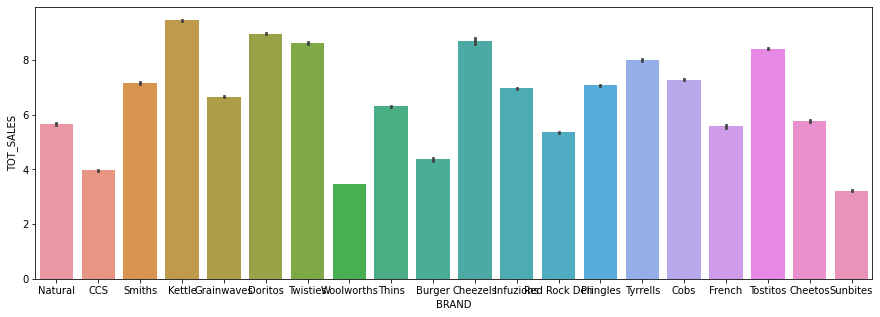

In [ ]:
plt.figure(figsize = (15,5))
sns.barplot(x = 'BRAND', y ='TOT_SALES', data = transaction)

In [ ]:
# Which brand has the most sales?
transaction.groupby('BRAND').TOT_SALES.sum().sort_values(ascending = False)

BRAND
Kettle           390239.8
Doritos          226329.9
Smiths           217492.0
Pringles         177655.5
Infuzions         99047.6
Thins             88852.5
Red Rock Deli     87607.5
Twisties          81522.1
Tostitos          79789.6
Cobs              70569.8
Tyrrells          51647.4
Grainwaves        51617.2
Natural           42318.0
Woolworths        41059.1
Cheezels          40029.9
CCS               18078.9
Cheetos           16884.5
Sunbites           9676.4
French             7929.0
Burger             6831.0
Name: TOT_SALES, dtype: float64

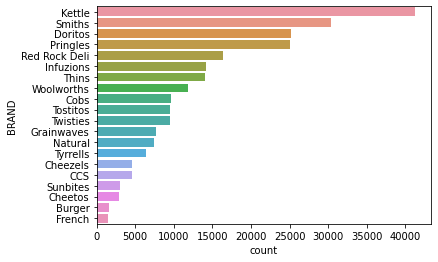

In [ ]:
sns.countplot(y = transaction['BRAND'], order = transaction['BRAND'].value_counts().index)

**OVERVIEW OF CUSTOMER BEHAVIOUR DISTRIBUTION FROM PURCHASE DATA**

In [ ]:
import plotly.express as px

cust_distribution = pd.pivot_table(purchase, index = ["LIFESTAGE", "PREMIUM_CUSTOMER"],
                              values = ["PREMIUM_CUSTOMER"], aggfunc = "size").reset_index()

cust_distribution.rename({0 : "COUNT", }, axis = 1, inplace = True)

fig = px.bar(data_frame = cust_distribution,
             y = "LIFESTAGE",
             x = "COUNT",
             barmode = "group",
             orientation = "h",
             color = "PREMIUM_CUSTOMER", 
             labels = {"LIFESTAGE" : "Customer's Lifestage",
                       "COUNT" : "Total Customers", 
                       "PREMIUM_CUSTOMER" : "Customer Group"},
             title = {"text": "Overview of Customers by Customer Group and Lifestage", "font_size" : 20, "x" : 0.5},
             color_discrete_sequence = px.colors.diverging.Portland,
            )

fig.show()

In [ ]:
print(purchase['LYLTY_CARD_NBR'].nunique())
print(purchase['LIFESTAGE'].nunique())

72637
7


- Loyalty Card Number and Lifestage is Unique for each row in Purchase Data

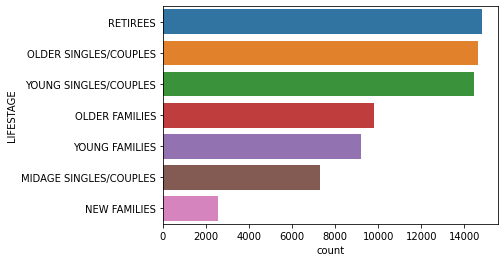

In [ ]:
sns.countplot(y = purchase['LIFESTAGE'], order = purchase['LIFESTAGE'].value_counts().index)

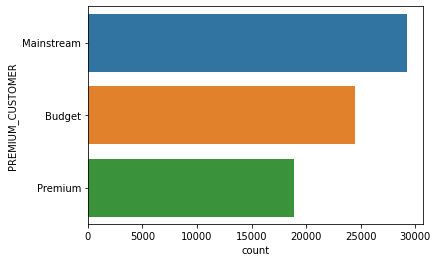

In [ ]:
sns.countplot(y = purchase['PREMIUM_CUSTOMER'], order = purchase['PREMIUM_CUSTOMER'].value_counts().index)

- The MAINSTREAM group is the prominent contributor for sales while the PREMIUM is the least
- The RETIREES is the most saleable group while NEW FAMILIES is the least

seem campy but we'll going more balls deep analysis



**CORRELATION BETWEEN PRODUCT QUANTITY AND TOTAL SALES**

In [ ]:
fig = make_subplots(rows = 1, cols = 2, shared_yaxes = True, 
                    subplot_titles = ["Distribution", "Correlation"])

fig.add_box(y = transaction["PROD_QTY"], name = "Product Qty", row = 1, col = 1, ) 
fig.add_box(y = transaction["TOT_SALES"], name = "Total Sales", row = 1, col = 1,)


fig.add_scattergl(x = transaction["PROD_QTY"],
                  y = transaction["TOT_SALES"],
                  mode = "markers", name = "", 
                  hoverinfo = "skip",
                  row = 1, col = 2,
                  )

fig.update_layout(title = {"text":"Correlation for Total Sales and Product Quantity",
                           "font_size" : 20, "x" : 0.5},
                  showlegend = False,
                 )
fig.show()

Correlation between product quantity purchased and sales made is **heteroscedastic**

**COMBINING THE DATA**

In [ ]:
Overall = pd.merge(transaction, purchase)

In [ ]:
Overall

DATE  STORE_NBR  ...               LIFESTAGE  PREMIUM_CUSTOMER
0      2018-10-17          1  ...   YOUNG SINGLES/COUPLES           Premium
1      2019-05-14          1  ...  MIDAGE SINGLES/COUPLES            Budget
2      2018-11-10          1  ...  MIDAGE SINGLES/COUPLES            Budget
3      2019-03-09          1  ...  MIDAGE SINGLES/COUPLES            Budget
4      2019-05-20          1  ...  MIDAGE SINGLES/COUPLES            Budget
...           ...        ...  ...                     ...               ...
246735 2019-03-09        272  ...   YOUNG SINGLES/COUPLES           Premium
246736 2018-08-13        272  ...   YOUNG SINGLES/COUPLES           Premium
246737 2018-11-06        272  ...   YOUNG SINGLES/COUPLES           Premium
246738 2018-12-27        272  ...   YOUNG SINGLES/COUPLES           Premium
246739 2018-09-22        272  ...   YOUNG SINGLES/COUPLES           Premium

[246740 rows x 12 columns]

In [ ]:
Overall.isnull().sum()

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
PACK_SIZE           0
BRAND               0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [ ]:
Overall.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246740 entries, 0 to 246739
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   DATE              246740 non-null  datetime64[ns]
 1   STORE_NBR         246740 non-null  int64         
 2   LYLTY_CARD_NBR    246740 non-null  int64         
 3   TXN_ID            246740 non-null  int64         
 4   PROD_NBR          246740 non-null  int64         
 5   PROD_NAME         246740 non-null  object        
 6   PROD_QTY          246740 non-null  int64         
 7   TOT_SALES         246740 non-null  float64       
 8   PACK_SIZE         246740 non-null  int64         
 9   BRAND             246740 non-null  object        
 10  LIFESTAGE         246740 non-null  object        
 11  PREMIUM_CUSTOMER  246740 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(6), object(4)
memory usage: 24.5+ MB


In [ ]:
Overall.describe()

STORE_NBR  LYLTY_CARD_NBR  ...      TOT_SALES      PACK_SIZE
count  246740.000000    2.467400e+05  ...  246740.000000  246740.000000
mean      135.050361    1.355303e+05  ...       7.316113     175.583521
std        76.786971    8.071520e+04  ...       2.474897      59.432118
min         1.000000    1.000000e+03  ...       1.700000      70.000000
25%        70.000000    7.001500e+04  ...       5.800000     150.000000
50%       130.000000    1.303670e+05  ...       7.400000     170.000000
75%       203.000000    2.030832e+05  ...       8.800000     175.000000
max       272.000000    2.373711e+06  ...      29.500000     380.000000

[8 rows x 7 columns]

# **Data analysis on customer segments**

**Metrics of interest**

- Overall Behaviour of each customers group by the amount of products purchased 
- The amount of customers in each segment
- The amount of chips bought per customer by segment
- The average price of chips by customer segment


In [ ]:
# Grouped sales by PREMIUM_CUSTOMER and LIFESTAGE

sales = pd.DataFrame(Overall.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["TOT_SALES"].agg(["sum", "mean"]))
sales.sort_values(ascending=False, by="sum")

sum      mean
LIFESTAGE              PREMIUM_CUSTOMER                     
OLDER FAMILIES         Budget            156863.75  7.291241
YOUNG SINGLES/COUPLES  Mainstream        147582.20  7.551279
RETIREES               Mainstream        145168.95  7.269352
YOUNG FAMILIES         Budget            129717.95  7.302705
OLDER SINGLES/COUPLES  Budget            127833.60  7.444305
                       Mainstream        124648.50  7.306049
                       Premium           123537.55  7.459997
RETIREES               Budget            105916.30  7.445786
OLDER FAMILIES         Mainstream         96413.55  7.281440
RETIREES               Premium            91296.65  7.461315
YOUNG FAMILIES         Mainstream         86338.25  7.226772
MIDAGE SINGLES/COUPLES Mainstream         84734.25  7.637156
YOUNG FAMILIES         Premium            78571.70  7.285951
OLDER FAMILIES         Premium            75242.60  7.232779
YOUNG SINGLES/COUPLES  Budget             57122.10  6.663023
MIDAGE SINGLES/COUPLES Premium            54443.85  7.152371
YOUNG SINGLES/COUPLES  Premium            39052.30  6.673325
MIDAGE SINGLES/COUPLES Budget             33345.70  7.108442
NEW FAMILIES           Budget             20607.45  7.297256
                       Mainstream         15979.70  7.313364
                       Premium            10760.80  7.231720

In [ ]:
segment_df = pd.pivot_table(data = Overall, 
                            values = ["TOT_SALES", "PROD_QTY"],
                            index = ["LIFESTAGE", "PREMIUM_CUSTOMER"], 
                            aggfunc = {"TOT_SALES": [np.sum, np.mean],
                                       "PROD_QTY" : [np.sum, np.mean]}
                           )

segment_df.columns = segment_df.columns.map("_".join)
segment_df.reset_index(inplace = True)
segment_df = segment_df.round(5)

In [ ]:
fig = make_subplots(rows=1, cols=3, specs=[[{"type": "domain"}, {"type": "domain"},{"type": "domain"}]])

segments = ["Budget", "Premium", "Mainstream"]

for each_group in segments:
    
    # add pie trace to each plot
    fig.add_trace(go.Pie(labels = segment_df.loc[segment_df["PREMIUM_CUSTOMER"] == each_group, "LIFESTAGE"],
                         values = segment_df.loc[segment_df["PREMIUM_CUSTOMER"] == each_group, "TOT_SALES_sum"], 
                         name = each_group,
                        ),
                  row = 1, col = segments.index(each_group) + 1)

fig.update_traces(hole = 0.6,
                  hoverinfo="label+value+name",
                  sort = False,
                  marker_colors = px.colors.diverging.Portland,
                  scalegroup = "one",
                  hovertext = "label+value+name")

fig.update_layout(legend = {"orientation": "h", "yanchor": "bottom", "y": -0.25, "xanchor": "center", "x": 0.5},
                  title = {"text": "Total Sales by Customer Group and Customer's Lifestage",
                           "font_size": 20, "x" : 0.5},
                  annotations = [{"text" : "Budget", "x" : 0.1, "y" : 0.5, "font_size": 15, "showarrow": False},
                                 {"text" : "Premium", "x" : 0.5, "y" : 0.5, "font_size": 15, "showarrow": False},
                                 {"text" : "Mainstream", "x" : 0.91, "y" : 0.5, "font_size": 15, "showarrow": False}],
                  height = 440)

fig.show()

The major contributors to chips sales are:
- **Budget** + Older Families
- **Premium** + Older Singles/Couples
- **Mainstream** + Young Singles/Couples
in Total Sales for respective customer group.

For each group + Older Singles/Couples the total sales figures are very close as well.


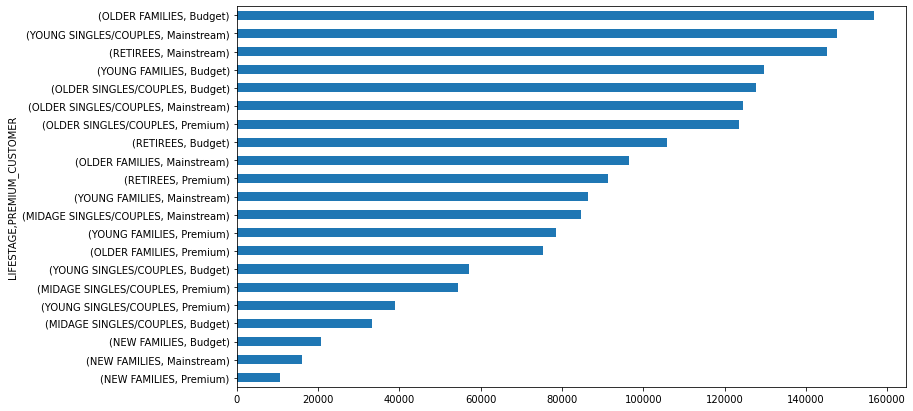

In [ ]:
sales["sum"].sort_values().plot.barh(figsize=(12,7))

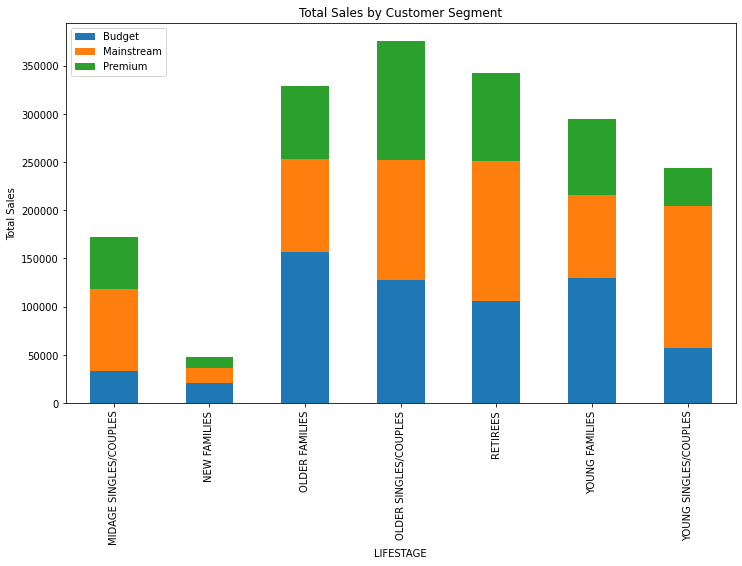

In [ ]:
salesPlot = pd.DataFrame(Overall.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).TOT_SALES.sum())
salesPlot.unstack().plot(kind = 'bar', stacked = True, figsize = (12, 7), title = 'Total Sales by Customer Segment')
plt.ylabel('Total Sales')
plt.legend(['Budget', 'Mainstream', 'Premium'], loc = 2)

- Top 3 sales come from **budget older families**, **mainstream young singles/couples** and **mainstream retirees**.

In [ ]:
px.scatter(data_frame = segment_df,
           y = "LIFESTAGE",
           x = "TOT_SALES_mean",
           symbol = "PREMIUM_CUSTOMER", color = "PREMIUM_CUSTOMER",
           size = "TOT_SALES_mean", size_max = 12,
           labels = {"LIFESTAGE": "Customer's Life Stage", 
                     "PREMIUM_CUSTOMER" : "Customer Class",
                     "TOT_SALES_mean" : "Average Sales per unit for the Segment"},
           height = 350,
           title = {"text": "Average Sales per unit for Customer Class and Life Stage Segment",
                    "font_size" : 20},
           color_discrete_sequence = px.colors.diverging.Portland
          )

- The average sales for each customer group segment lies between 6.6 and 7.7.
- It also does not vary much between the lifestages except, for the Midage & Young Singles/ Couples group.


In [ ]:
px.scatter(data_frame = segment_df,
           y = "LIFESTAGE",
           x = "PROD_QTY_mean",
           symbol = "PREMIUM_CUSTOMER", color = "PREMIUM_CUSTOMER",
           size = "PROD_QTY_mean", size_max = 12,
           labels = {"LIFESTAGE": "Customer's Life Stage", 
                     "PREMIUM_CUSTOMER" : "Customer Group",
                     "PROD_QTY_mean" : "Average Quantity for the Segment"},
           height = 350,
           title = {"text": "Average Quantity Purchased by Customer Group and Life Stage Segment",
                    "font_size": 20},
           color_discrete_sequence = px.colors.diverging.Portland
          )

- Similar to the average sales, the average quantity purchased by the customers from each of the segment does not have a higher variance.

In [ ]:
# Number of unique customers by PREMIUM_CUSTOMER and LIFESTAGE

customers = pd.DataFrame(Overall.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE']).LYLTY_CARD_NBR.nunique())
customers.rename(columns = {'LYLTY_CARD_NBR': 'Number of Customers'}, inplace = True)
customers.sort_values(by = 'Number of Customers', ascending = False)

Number of Customers
PREMIUM_CUSTOMER LIFESTAGE                                  
Mainstream       YOUNG SINGLES/COUPLES                  7917
                 RETIREES                               6358
                 OLDER SINGLES/COUPLES                  4858
Budget           OLDER SINGLES/COUPLES                  4849
Premium          OLDER SINGLES/COUPLES                  4682
Budget           OLDER FAMILIES                         4611
                 RETIREES                               4385
                 YOUNG FAMILIES                         3953
Premium          RETIREES                               3812
Budget           YOUNG SINGLES/COUPLES                  3647
Mainstream       MIDAGE SINGLES/COUPLES                 3298
                 OLDER FAMILIES                         2788
                 YOUNG FAMILIES                         2685
Premium          YOUNG SINGLES/COUPLES                  2480
                 YOUNG FAMILIES                         2398
                 MIDAGE SINGLES/COUPLES                 2369
                 OLDER FAMILIES                         2231
Budget           MIDAGE SINGLES/COUPLES                 1474
                 NEW FAMILIES                           1087
Mainstream       NEW FAMILIES                            830
Premium          NEW FAMILIES                            575

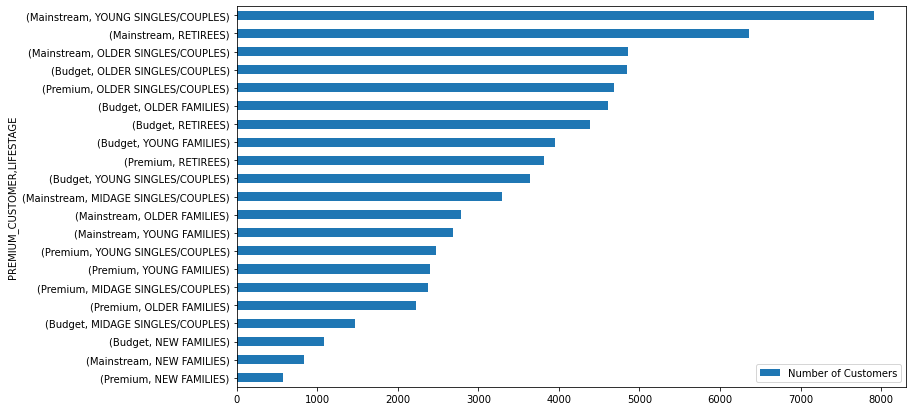

In [ ]:
customers.sort_values(by = 'Number of Customers').plot.barh(figsize=(12,7))

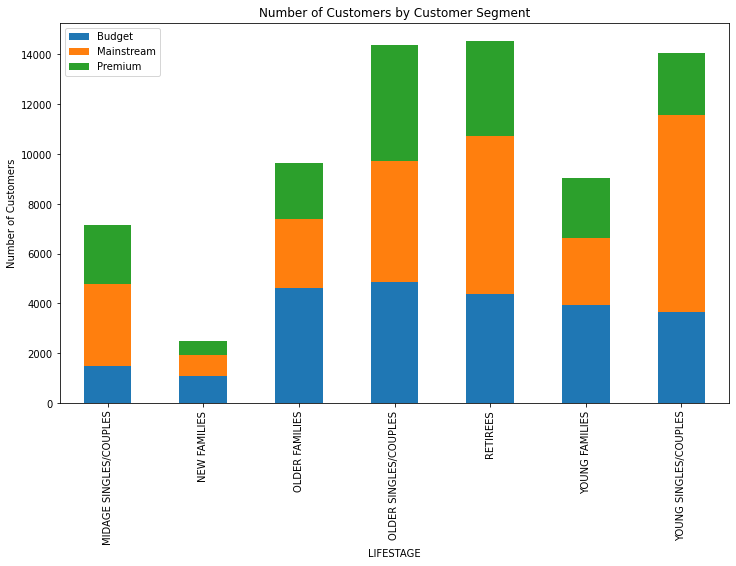

In [ ]:
customersPlot = pd.DataFrame(Overall.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).LYLTY_CARD_NBR.nunique())
customersPlot.unstack().plot(kind = 'bar', stacked = True, figsize = (12, 7), title = 'Number of Customers by Customer Segment')
plt.ylabel('Number of Customers')
plt.legend(['Budget', 'Mainstream', 'Premium'], loc = 2)

There are more mainstream young singles/couples and retirees. This contributes to to more chips sales in these segments however this is not the major driver for the budget older families segment. 
The high sales amount by segment "Young Singles/Couples - Mainstream" and "Retirees - Mainstream" are due to their large number of unique customers, but not for the "Older - Budget" segment.

In [ ]:
# Average units per customer by PREMIUM_CUSTOMER and LIFESTAGE

avg_units = Overall.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE']).PROD_QTY.sum() / Overall.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE']).LYLTY_CARD_NBR.nunique()
avg_units = pd.DataFrame(avg_units, columns = {'Average Unit per Customer'})
avg_units.sort_values(by = 'Average Unit per Customer', ascending = False)

Average Unit per Customer
PREMIUM_CUSTOMER LIFESTAGE                                        
Mainstream       OLDER FAMILIES                           9.255380
Budget           OLDER FAMILIES                           9.076773
Premium          OLDER FAMILIES                           9.071717
Budget           YOUNG FAMILIES                           8.722995
Premium          YOUNG FAMILIES                           8.716013
Mainstream       YOUNG FAMILIES                           8.638361
Budget           OLDER SINGLES/COUPLES                    6.781398
Premium          OLDER SINGLES/COUPLES                    6.769543
Mainstream       OLDER SINGLES/COUPLES                    6.712021
                 MIDAGE SINGLES/COUPLES                   6.432080
Budget           RETIREES                                 6.141847
Premium          RETIREES                                 6.103358
                 MIDAGE SINGLES/COUPLES                   6.078514
Budget           MIDAGE SINGLES/COUPLES                   6.026459
Mainstream       RETIREES                                 5.925920
                 NEW FAMILIES                             4.891566
Budget           NEW FAMILIES                             4.821527
Premium          NEW FAMILIES                             4.815652
Mainstream       YOUNG SINGLES/COUPLES                    4.575597
Premium          YOUNG SINGLES/COUPLES                    4.264113
Budget           YOUNG SINGLES/COUPLES                    4.250069

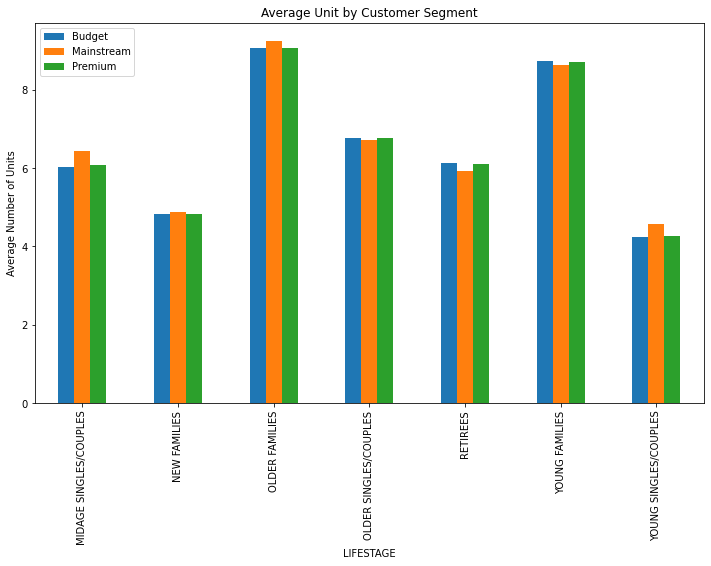

In [ ]:
avgUnitsPlot = pd.DataFrame(Overall.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).PROD_QTY.sum() / Overall.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).LYLTY_CARD_NBR.nunique())
avgUnitsPlot.unstack().plot(kind = 'bar', figsize = (12, 7), title = 'Average Unit by Customer Segment')
plt.ylabel('Average Number of Units')
plt.legend(['Budget', 'Mainstream', 'Premium'], loc = 2)


Older families and young families buy more chips per customer.

In [ ]:
# Average price per unit by PREMIUM_CUSTOMER and LIFESTAGE
avg_price = Overall.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE']).TOT_SALES.sum() / Overall.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE']).PROD_QTY.sum()
avg_price = pd.DataFrame(avg_price, columns = {'Price per Unit'})
avg_price.sort_values(by = 'Price per Unit', ascending = False)


Price per Unit
PREMIUM_CUSTOMER LIFESTAGE                             
Mainstream       YOUNG SINGLES/COUPLES         4.074043
                 MIDAGE SINGLES/COUPLES        3.994449
                 NEW FAMILIES                  3.935887
Budget           RETIREES                      3.932731
                 NEW FAMILIES                  3.931969
Premium          RETIREES                      3.924037
                 OLDER SINGLES/COUPLES         3.897698
Budget           OLDER SINGLES/COUPLES         3.887529
Premium          NEW FAMILIES                  3.886168
Mainstream       RETIREES                      3.852986
                 OLDER SINGLES/COUPLES         3.822753
Premium          MIDAGE SINGLES/COUPLES        3.780823
Budget           YOUNG FAMILIES                3.761903
Premium          YOUNG FAMILIES                3.759232
Budget           MIDAGE SINGLES/COUPLES        3.753878
                 OLDER FAMILIES                3.747969
Mainstream       OLDER FAMILIES                3.736380
                 YOUNG FAMILIES                3.722439
Premium          OLDER FAMILIES                3.717703
                 YOUNG SINGLES/COUPLES         3.692889
Budget           YOUNG SINGLES/COUPLES         3.685297

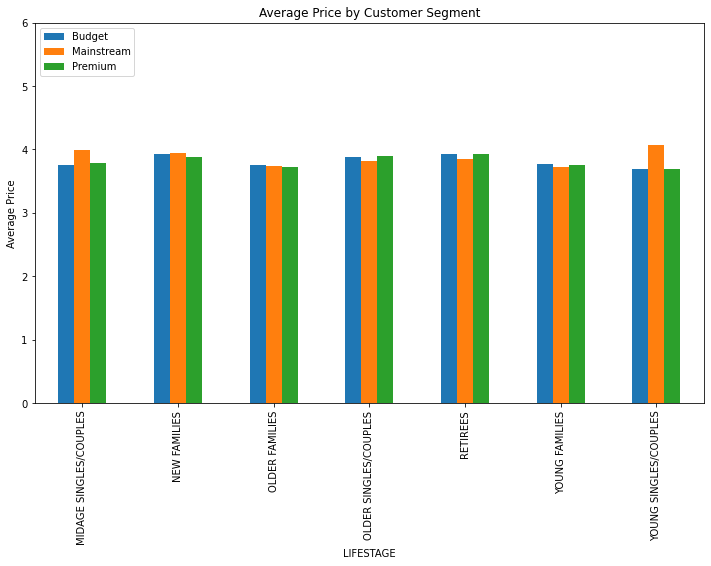

In [ ]:
avgPricePlot = pd.DataFrame(Overall.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).TOT_SALES.sum() / Overall.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).PROD_QTY.sum())
avgPricePlot.unstack().plot(kind = 'bar', figsize = (12, 7), title = 'Average Price by Customer Segment', ylim = (0, 6))
plt.ylabel('Average Price')
plt.legend(['Budget', 'Mainstream', 'Premium'], loc = 2)

Mainstream midage and young singles and couples are more willing to pay more per packet of chips compared to their budget and premium counterparts. This may be due to premium shoppers being more likely to buy healthy snacks and when they do buy chips, it is mainly for entertainment purposes rather than their own consumption. This is also supported by there being fewer premium midage and young singles and couples buying chips compared to their mainstream counterparts.

## **How different is Avg sales for Mainstream Midage & Young Singles/Couples?**
This t-test will help us understand if the average price spent by Mainstream Midage & Young Single/ Couple is significantly different from average price spent by Premium & Budget Midage & Young Single/ Couple Customers.

Hypothesis for the test:

$H_0 : \bar{x}_M = \bar{x}_{(B \space or \space P)}$

$H_{\alpha} : \bar{x}_M \neq \bar{x}_{(B \space or \space P)}$

At significance or $\alpha = 5\%$


In [ ]:
import statsmodels.api as sm
from scipy import stats

mainstream = Overall.loc[(Overall["PREMIUM_CUSTOMER"] == "Mainstream") &
                              (Overall["LIFESTAGE"].isin(["MIDAGE SINGLES/COUPLES", 
                                                               "YOUNG SINGLES/COUPLES"])), "TOT_SALES"]


budget = Overall.loc[(Overall["PREMIUM_CUSTOMER"] == "Budget") &
                          (Overall["LIFESTAGE"].isin(["MIDAGE SINGLES/COUPLES",
                                                           "YOUNG SINGLES/COUPLES"])), "TOT_SALES"]

premium = Overall.loc[(Overall["PREMIUM_CUSTOMER"] == "Premium") &
                           (Overall["LIFESTAGE"].isin(["MIDAGE SINGLES/COUPLES", 
                                                            "YOUNG SINGLES/COUPLES"])), "TOT_SALES"]

var = [np.var(each) for each in [mainstream, budget, premium]]
 
t_stats, p_value = stats.ttest_ind(a = mainstream, b = budget, equal_var = False)
print("For Mainstream vs Budget test statistics and the p-value are {:.3f} and {:.5f}".format(t_stats, p_value))

t_stats, p_value = stats.ttest_ind(a = mainstream, b = premium, equal_var = False)
print("For Mainstream vs Premium test statistics and the p-value are {:.3f} and {:.5f}".format(t_stats, p_value))


# budget and premium added together
bgt_prm = Overall.loc[(Overall["PREMIUM_CUSTOMER"] != "Mainstream") &
                           (Overall["LIFESTAGE"].isin(["MIDAGE SINGLES/COUPLES", 
                                                            "YOUNG SINGLES/COUPLES"])), "TOT_SALES"]

np.var(bgt_prm)

t_stats, p_value = stats.ttest_ind(a = mainstream, b = bgt_prm, equal_var = False)
print("For Mainstream vs Others test statistics and the p-value are {:.3f} and {:.5f}".format(t_stats, p_value))


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



For Mainstream vs Budget test statistics and the p-value are 28.678 and 0.00000
For Mainstream vs Premium test statistics and the p-value are 24.240 and 0.00000
For Mainstream vs Others test statistics and the p-value are 33.067 and 0.00000


Text(0.5, 0, 'Price per Unit')

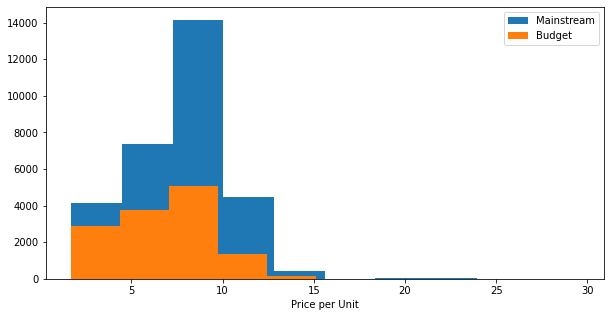

In [ ]:
plt.figure(figsize = (10, 5))
plt.hist(mainstream, label = 'Mainstream')
plt.hist(budget, label = 'Budget')
plt.legend()
plt.xlabel('Price per Unit')

Text(0.5, 0, 'Price per Unit')

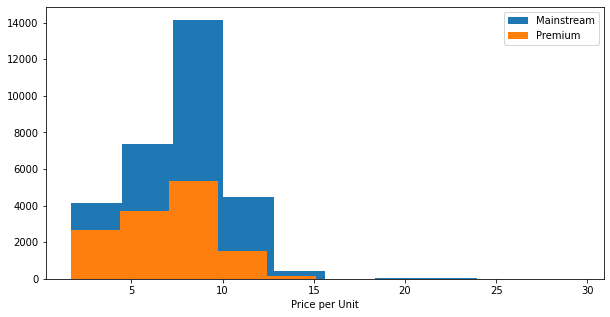

In [ ]:
plt.figure(figsize = (10, 5))
plt.hist(mainstream, label = 'Mainstream')
plt.hist(premium, label = 'Premium')
plt.legend()
plt.xlabel('Price per Unit')

Text(0.5, 0, 'Price per Unit')

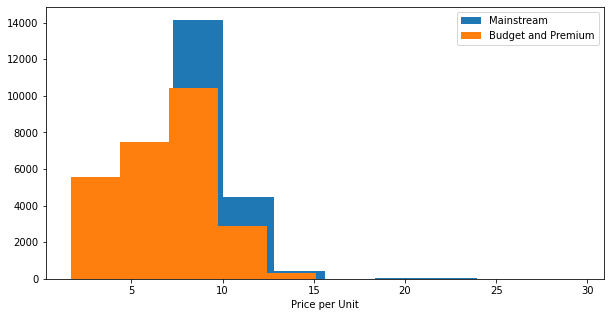

In [ ]:
plt.figure(figsize = (10, 5))
plt.hist(mainstream, label = 'Mainstream')
plt.hist(bgt_prm, label = 'Budget and Premium')
plt.legend()
plt.xlabel('Price per Unit')

In [ ]:
print('Mainstream average price per unit: ', np.mean(mainstream))
print('Budget average price per unit: ', np.mean(budget))
print('Premium average price per unit: ', np.mean(premium))
print('Non-mainstream average price per unit: ', np.mean(bgt_prm))

if np.mean(mainstream) > np.mean(bgt_prm) and np.mean(budget) and np.mean(premium):
    print("Mainstream customers have higher average price per unit. ")
else:
    print("Non-mainstream customers have higher average price per unit. ")


Mainstream average price per unit:  7.582377035803508
Budget average price per unit:  6.820551869722566
Premium average price per unit:  6.94415849673208
Non-mainstream average price per unit:  6.882817644417504
Mainstream customers have higher average price per unit. 


Based on the t-test results, we can conclude that, at 5% significance, statistically, average sales for Mainstream - midage & young singles/ couples segment is different as compared to

- Budget - midage & young singles/ couples
- Premium - midage & young singles/ couples
- Budget & Premium - midage & young singles/ couples - combined


# **Brand Affinity Analysis**

Next, let's look examine what brand of chips the top 3 segments contributing to Total Sales are buying.

In [ ]:
Overall.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["BRAND"].agg(pd.Series.mode).sort_values()

LIFESTAGE               PREMIUM_CUSTOMER
MIDAGE SINGLES/COUPLES  Budget              Kettle
YOUNG SINGLES/COUPLES   Budget              Kettle
YOUNG FAMILIES          Premium             Kettle
                        Mainstream          Kettle
                        Budget              Kettle
RETIREES                Premium             Kettle
                        Mainstream          Kettle
                        Budget              Kettle
OLDER SINGLES/COUPLES   Premium             Kettle
YOUNG SINGLES/COUPLES   Mainstream          Kettle
OLDER SINGLES/COUPLES   Mainstream          Kettle
OLDER FAMILIES          Premium             Kettle
                        Mainstream          Kettle
                        Budget              Kettle
NEW FAMILIES            Premium             Kettle
                        Mainstream          Kettle
                        Budget              Kettle
MIDAGE SINGLES/COUPLES  Premium             Kettle
                        Mainstream       

========== YOUNG SINGLES/COUPLES - Premium ==========
Kettle      838
Smiths      787
Pringles    537
Name: BRAND, dtype: int64


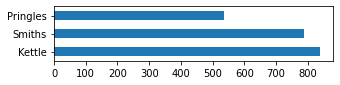

========== YOUNG SINGLES/COUPLES - Budget ==========
Kettle      1211
Smiths      1185
Pringles     832
Name: BRAND, dtype: int64


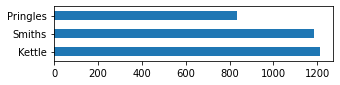

========== YOUNG SINGLES/COUPLES - Mainstream ==========
Kettle      3844
Doritos     2379
Pringles    2315
Name: BRAND, dtype: int64


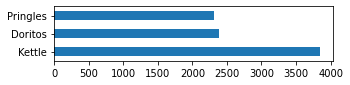

========== MIDAGE SINGLES/COUPLES - Premium ==========
Kettle      1206
Smiths       923
Pringles     781
Name: BRAND, dtype: int64


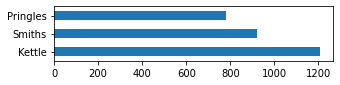

========== MIDAGE SINGLES/COUPLES - Budget ==========
Kettle     713
Smiths     591
Doritos    479
Name: BRAND, dtype: int64


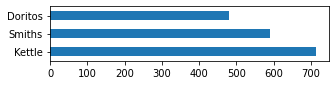

========== MIDAGE SINGLES/COUPLES - Mainstream ==========
Kettle     2136
Smiths     1276
Doritos    1210
Name: BRAND, dtype: int64


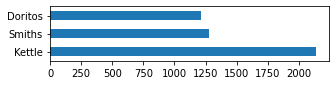

========== NEW FAMILIES - Premium ==========
Kettle      247
Pringles    165
Smiths      155
Name: BRAND, dtype: int64


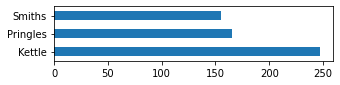

========== NEW FAMILIES - Budget ==========
Kettle     510
Smiths     328
Doritos    315
Name: BRAND, dtype: int64


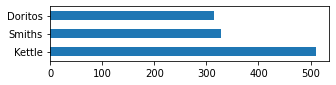

========== NEW FAMILIES - Mainstream ==========
Kettle     414
Doritos    257
Smiths     244
Name: BRAND, dtype: int64


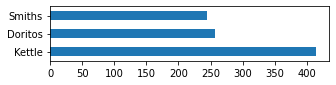

========== OLDER FAMILIES - Premium ==========
Kettle      1512
Smiths      1448
Pringles    1014
Name: BRAND, dtype: int64


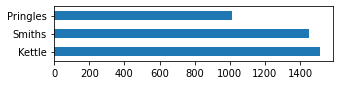

========== OLDER FAMILIES - Budget ==========
Kettle     3320
Smiths     2948
Doritos    2032
Name: BRAND, dtype: int64


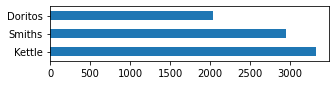

========== OLDER FAMILIES - Mainstream ==========
Kettle     2019
Smiths     1742
Doritos    1263
Name: BRAND, dtype: int64


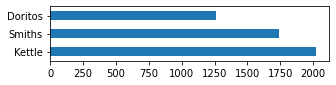

========== OLDER SINGLES/COUPLES - Premium ==========
Kettle     2947
Smiths     1952
Doritos    1784
Name: BRAND, dtype: int64


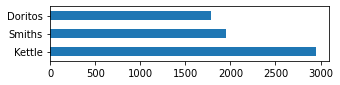

========== OLDER SINGLES/COUPLES - Budget ==========
Kettle      3065
Smiths      2010
Pringles    1843
Name: BRAND, dtype: int64


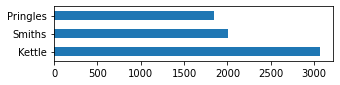

========== OLDER SINGLES/COUPLES - Mainstream ==========
Kettle     2835
Smiths     2070
Doritos    1791
Name: BRAND, dtype: int64


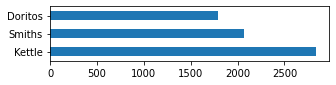

========== RETIREES - Premium ==========
Kettle      2216
Smiths      1395
Pringles    1331
Name: BRAND, dtype: int64


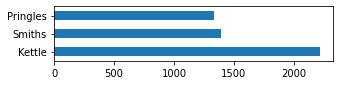

========== RETIREES - Budget ==========
Kettle     2592
Smiths     1612
Doritos    1592
Name: BRAND, dtype: int64


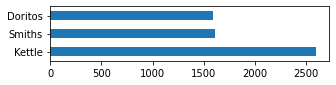

========== RETIREES - Mainstream ==========
Kettle      3386
Smiths      2367
Pringles    2103
Name: BRAND, dtype: int64


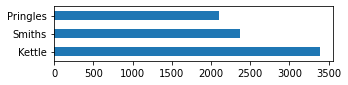

========== YOUNG FAMILIES - Premium ==========
Kettle      1745
Smiths      1384
Pringles    1007
Name: BRAND, dtype: int64


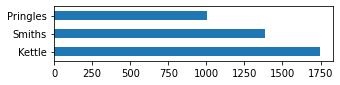

========== YOUNG FAMILIES - Budget ==========
Kettle     2743
Smiths     2334
Doritos    1767
Name: BRAND, dtype: int64


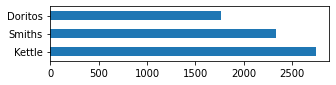

========== YOUNG FAMILIES - Mainstream ==========
Kettle      1789
Smiths      1681
Pringles    1148
Name: BRAND, dtype: int64


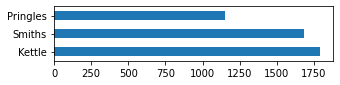

In [ ]:
for stage in Overall["LIFESTAGE"].unique():
    for prem in Overall["PREMIUM_CUSTOMER"].unique():
        print('==========',stage, '-', prem,'==========')
        summary = Overall[(Overall["LIFESTAGE"] == stage) & (Overall["PREMIUM_CUSTOMER"] == prem)]["BRAND"].value_counts().head(3)
        print(summary)
        plt.figure()
        summary.plot.barh(figsize=(5,1))
        plt.show()

*Every segment* had **Kettle** as the most purchased brand. *Every segment except "YOUNG SINGLES/COUPLES Mainstream"* had **Smiths** as their second most purchased brand. *"YOUNG SINGLES/COUPLES Mainstream"* had **Doritos** as their second most purchased brand.

Let's examine mainstream young singles/couples (as the Target) against the rest of the customer segments to see if they prefer any particular brand of chips

In [ ]:
target = Overall.loc[(Overall['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') & (Overall['PREMIUM_CUSTOMER'] == 'Mainstream'), :]
nonTarget = Overall.loc[(Overall['LIFESTAGE'] != 'YOUNG SINGLES/COUPLES' ) & (Overall['PREMIUM_CUSTOMER'] != 'Mainstream'), :]

In [ ]:
# Target Segment
targetBrand = target.loc[:, ['BRAND', 'PROD_QTY']]
targetSum = targetBrand['PROD_QTY'].sum()
targetBrand['Target Brand Affinity'] = targetBrand['PROD_QTY'] / targetSum
targetBrand = pd.DataFrame(targetBrand.groupby('BRAND')['Target Brand Affinity'].sum())

# Non-target segment
nonTargetBrand = nonTarget.loc[:, ['BRAND', 'PROD_QTY']]
nonTargetSum = nonTargetBrand['PROD_QTY'].sum()
nonTargetBrand['Non-Target Brand Affinity'] = nonTargetBrand['PROD_QTY'] / nonTargetSum
nonTargetBrand = pd.DataFrame(nonTargetBrand.groupby('BRAND')['Non-Target Brand Affinity'].sum())

In [ ]:
# Merge the two dataframes together

brand_proportions = pd.merge(targetBrand, nonTargetBrand, left_index = True, right_index = True)
brand_proportions.head()

Target Brand Affinity  Non-Target Brand Affinity
BRAND                                                     
Burger                 0.002926                   0.006538
CCS                    0.011180                   0.018445
Cheetos                0.008033                   0.011759
Cheezels               0.017971                   0.018904
Cobs                   0.044638                   0.038449

In [ ]:
brand_proportions['Affinity to Brand'] = brand_proportions['Target Brand Affinity'] / brand_proportions['Non-Target Brand Affinity']
brand_proportions.sort_values(by = 'Affinity to Brand', ascending = False)

Target Brand Affinity  ...  Affinity to Brand
BRAND                                 ...                   
Tyrrells                    0.031553  ...           1.227025
Twisties                    0.046184  ...           1.217506
Doritos                     0.122761  ...           1.213397
Kettle                      0.197985  ...           1.188667
Tostitos                    0.045411  ...           1.184100
Pringles                    0.119420  ...           1.181090
Cobs                        0.044638  ...           1.160959
Infuzions                   0.064679  ...           1.126622
Thins                       0.060373  ...           1.056217
Grainwaves                  0.032712  ...           1.052895
Cheezels                    0.017971  ...           0.950653
Smiths                      0.096370  ...           0.775811
French                      0.003948  ...           0.691724
Cheetos                     0.008033  ...           0.683150
Red Rock Deli               0.043810  ...           0.652080
Natural                     0.019600  ...           0.633091
CCS                         0.011180  ...           0.606142
Sunbites                    0.006349  ...           0.503398
Woolworths                  0.024099  ...           0.494376
Burger                      0.002926  ...           0.447574

[20 rows x 3 columns]

Mainstream young singles/couples are more likely to purchase Tyrrells chips compared to other brands.

Now we do brand afinity analysis for overall segment

In [ ]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

temp = Overall.reset_index().rename(columns = {"index": "transaction"})
temp["Segment"] = temp["LIFESTAGE"] + ' - ' + temp['PREMIUM_CUSTOMER']
segment_brand_encode = pd.concat([pd.get_dummies(temp["Segment"]), pd.get_dummies(temp["BRAND"])], axis=1)

frequent_sets = apriori(segment_brand_encode, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_sets, metric="lift", min_threshold=1)

set_temp = temp["Segment"].unique()
rules[rules["antecedents"].apply(lambda x: list(x)).apply(lambda x: x in set_temp)]


antecedents consequents  ...  leverage  conviction
1              (OLDER FAMILIES - Budget)    (Smiths)  ...  0.001222    1.016236
3       (OLDER SINGLES/COUPLES - Budget)    (Kettle)  ...  0.000776    1.013578
4      (OLDER SINGLES/COUPLES - Premium)    (Kettle)  ...  0.000713    1.012925
7                    (RETIREES - Budget)    (Kettle)  ...  0.000858    1.018196
9                (RETIREES - Mainstream)    (Kettle)  ...  0.000180    1.002674
10  (YOUNG SINGLES/COUPLES - Mainstream)    (Kettle)  ...  0.002325    1.036537

[6 rows x 9 columns]

By looking at our a-priori analysis, we can conclude that **Kettle** is the brand of choice for most segment.

# **Pack Size Affinity Analysis**

========== YOUNG SINGLES/COUPLES - Premium ==========
175    1618
150     933
134     537
Name: PACK_SIZE, dtype: int64


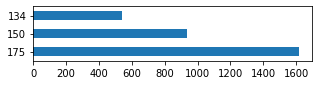

========== YOUNG SINGLES/COUPLES - Budget ==========
175    2338
150    1390
134     832
Name: PACK_SIZE, dtype: int64


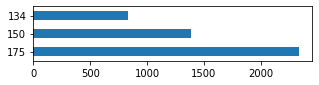

========== YOUNG SINGLES/COUPLES - Mainstream ==========
175    4997
150    3080
134    2315
Name: PACK_SIZE, dtype: int64


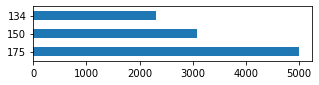

========== MIDAGE SINGLES/COUPLES - Premium ==========
175    2082
150    1207
134     781
Name: PACK_SIZE, dtype: int64


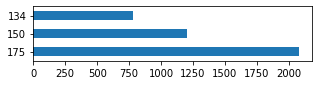

========== MIDAGE SINGLES/COUPLES - Budget ==========
175    1277
150     771
134     449
Name: PACK_SIZE, dtype: int64


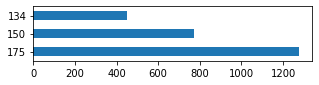

========== MIDAGE SINGLES/COUPLES - Mainstream ==========
175    2975
150    1777
134    1159
Name: PACK_SIZE, dtype: int64


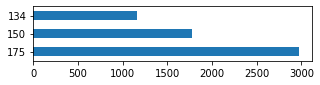

========== NEW FAMILIES - Premium ==========
175    376
150    233
134    165
Name: PACK_SIZE, dtype: int64


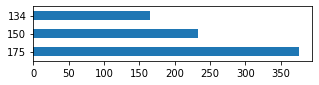

========== NEW FAMILIES - Budget ==========
175    777
150    440
134    309
Name: PACK_SIZE, dtype: int64


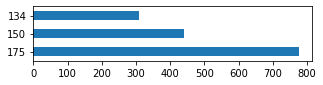

========== NEW FAMILIES - Mainstream ==========
175    589
150    374
134    224
Name: PACK_SIZE, dtype: int64


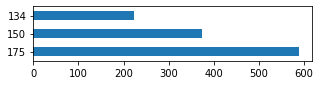

========== OLDER FAMILIES - Premium ==========
175    2816
150    1673
134    1014
Name: PACK_SIZE, dtype: int64


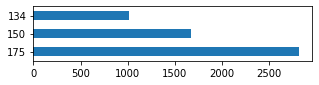

========== OLDER FAMILIES - Budget ==========
175    5808
150    3588
134    1996
Name: PACK_SIZE, dtype: int64


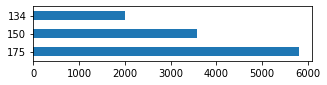

========== OLDER FAMILIES - Mainstream ==========
175    3588
150    2189
134    1234
Name: PACK_SIZE, dtype: int64


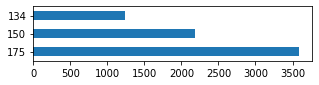

========== OLDER SINGLES/COUPLES - Premium ==========
175    4458
150    2768
134    1744
Name: PACK_SIZE, dtype: int64


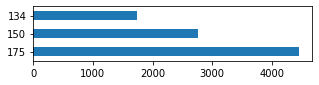

========== OLDER SINGLES/COUPLES - Budget ==========
175    4625
150    2811
134    1843
Name: PACK_SIZE, dtype: int64


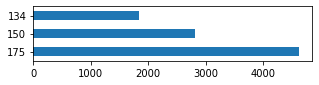

========== OLDER SINGLES/COUPLES - Mainstream ==========
175    4525
150    2773
134    1720
Name: PACK_SIZE, dtype: int64


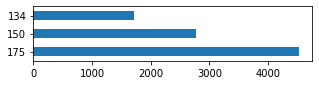

========== RETIREES - Premium ==========
175    3306
150    1943
134    1331
Name: PACK_SIZE, dtype: int64


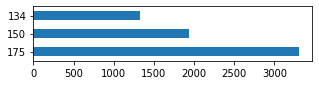

========== RETIREES - Budget ==========
175    3847
150    2319
134    1517
Name: PACK_SIZE, dtype: int64


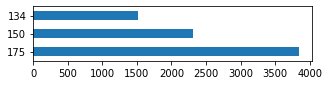

========== RETIREES - Mainstream ==========
175    5295
150    3290
134    2103
Name: PACK_SIZE, dtype: int64


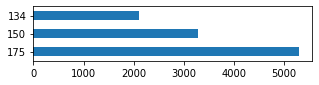

========== YOUNG FAMILIES - Premium ==========
175    2998
150    1778
134    1007
Name: PACK_SIZE, dtype: int64


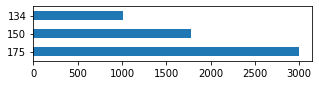

========== YOUNG FAMILIES - Budget ==========
175    4921
150    2862
134    1674
Name: PACK_SIZE, dtype: int64


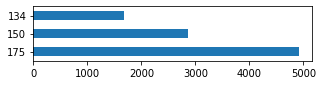

========== YOUNG FAMILIES - Mainstream ==========
175    3174
150    2004
134    1148
Name: PACK_SIZE, dtype: int64


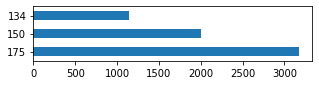

In [ ]:
for stage in Overall["LIFESTAGE"].unique():
    for prem in Overall["PREMIUM_CUSTOMER"].unique():
        print('==========',stage, '-', prem,'==========')
        summary = Overall[(Overall["LIFESTAGE"] == stage) & (Overall["PREMIUM_CUSTOMER"] == prem)]["PACK_SIZE"].value_counts().head(3)
        print(summary)
        plt.figure()
        summary.plot.barh(figsize=(5,1))
        plt.show()

All of the segments prefer the 175gr pack size chips, followed by the 150gr size.

Now lets do for our target segment

In [ ]:
# Target segment 
targetSize = target.loc[:, ['PACK_SIZE', 'PROD_QTY']]
targetSum = targetSize['PROD_QTY'].sum()
targetSize['Target Pack Affinity'] = targetSize['PROD_QTY'] / targetSum
targetSize = pd.DataFrame(targetSize.groupby('PACK_SIZE')['Target Pack Affinity'].sum())

# Non-target segment
nonTargetSize = nonTarget.loc[:, ['PACK_SIZE', 'PROD_QTY']]
nonTargetSum = nonTargetSize['PROD_QTY'].sum()
nonTargetSize['Non-Target Pack Affinity'] = nonTargetSize['PROD_QTY'] / nonTargetSum
nonTargetSize = pd.DataFrame(nonTargetSize.groupby('PACK_SIZE')['Non-Target Pack Affinity'].sum())

In [ ]:
# Merge the two dataframes together

pack_proportions = pd.merge(targetSize, nonTargetSize, left_index = True, right_index = True)
pack_proportions.head()

Target Pack Affinity  Non-Target Pack Affinity
PACK_SIZE                                                
70                     0.003037                  0.006284
90                     0.006349                  0.012613
110                    0.106280                  0.089575
125                    0.003009                  0.005976
134                    0.119420                  0.101110

In [ ]:
pack_proportions['Affinity to Pack'] = pack_proportions['Target Pack Affinity'] / pack_proportions['Non-Target Pack Affinity']
pack_proportions.sort_values(by = 'Affinity to Pack', ascending = False)

Target Pack Affinity  Non-Target Pack Affinity  Affinity to Pack
PACK_SIZE                                                                  
270                    0.031829                  0.025070          1.269608
380                    0.032160                  0.025711          1.250827
330                    0.061284                  0.050974          1.202243
110                    0.106280                  0.089575          1.186492
134                    0.119420                  0.101110          1.181090
210                    0.029124                  0.024891          1.170020
135                    0.014769                  0.012931          1.142086
250                    0.014355                  0.012863          1.115959
170                    0.080773                  0.080347          1.005300
150                    0.157598                  0.163070          0.966449
175                    0.254990                  0.271458          0.939335
165                    0.055652                  0.061587          0.903629
190                    0.007481                  0.012131          0.616696
180                    0.003589                  0.006177          0.580943
160                    0.006404                  0.012222          0.524013
125                    0.003009                  0.005976          0.503490
90                     0.006349                  0.012613          0.503398
200                    0.008972                  0.018471          0.485711
70                     0.003037                  0.006284          0.483256
220                    0.002926                  0.006538          0.447574

It looks like mainstream singles/couples are more likely to purchase a 270g pack size compared to other pack sizes.

In [ ]:
# Which brand offers 270g pack size?

Overall.loc[Overall['PACK_SIZE'] == 270, 'BRAND'].unique()

array(['Twisties'], dtype=object)

Twisties is the only brand that offer 270g size

In [ ]:
# What is the product name that offers 270g size?

print([each for each in Overall.loc[Overall["PACK_SIZE"] == 270, "PROD_NAME"].unique()])

['Twisties Cheese     ', 'Twisties Chicken']


In [ ]:
z = temp.groupby(["Segment", "BRAND"]).sum()["TOT_SALES"].sort_values(ascending=False).reset_index()
z[z["Segment"] == "YOUNG SINGLES/COUPLES - Mainstream"]

Segment          BRAND  TOT_SALES
0    YOUNG SINGLES/COUPLES - Mainstream         Kettle    35423.6
8    YOUNG SINGLES/COUPLES - Mainstream        Doritos    20925.9
22   YOUNG SINGLES/COUPLES - Mainstream       Pringles    16006.2
24   YOUNG SINGLES/COUPLES - Mainstream         Smiths    14958.9
54   YOUNG SINGLES/COUPLES - Mainstream      Infuzions     8749.4
61   YOUNG SINGLES/COUPLES - Mainstream       Twisties     7539.8
69   YOUNG SINGLES/COUPLES - Mainstream       Tostitos     7238.0
70   YOUNG SINGLES/COUPLES - Mainstream          Thins     7217.1
84   YOUNG SINGLES/COUPLES - Mainstream           Cobs     6144.6
115  YOUNG SINGLES/COUPLES - Mainstream       Tyrrells     4800.6
122  YOUNG SINGLES/COUPLES - Mainstream  Red Rock Deli     4509.9
136  YOUNG SINGLES/COUPLES - Mainstream     Grainwaves     4201.0
172  YOUNG SINGLES/COUPLES - Mainstream       Cheezels     3318.3
227  YOUNG SINGLES/COUPLES - Mainstream        Natural     2130.0
258  YOUNG SINGLES/COUPLES - Mainstream     Woolworths     1605.8
298  YOUNG SINGLES/COUPLES - Mainstream        Cheetos      898.8
308  YOUNG SINGLES/COUPLES - Mainstream            CCS      850.5
362  YOUNG SINGLES/COUPLES - Mainstream         French      429.0
371  YOUNG SINGLES/COUPLES - Mainstream       Sunbites      391.0
394  YOUNG SINGLES/COUPLES - Mainstream         Burger      243.8

## **Summary & Conclusion**

- Young Singles/Couples (Mainstream) has the highest population, followed by Retirees (Mainstream). Which explains their high total sales.
- Despite Older Families not having the highest population, they have the highest frequency of purchase, which contributes to their high total sales.
- Older Families followed by Young Families has the highest average quantity of chips bought per purchase.
- The Mainstream category of the "Young and Midage Singles/Couples" have the highest spending of chips per purchase. And the difference to the non-Mainstream "Young and Midage Singles/Couples" are statistically significant.
- Chips brand Kettle is dominating every segment as the most purchased brand.
- Observing the 2nd most purchased brand, "Young and Midage Singles/Couples" is the only segment with a different preference (Doritos) as compared to others' (Smiths).
- Most frequent chip size purchased is 175gr followed by the 150gr chip size for all segments.

Out of the three customer groups - Premium, Budget & Mainstream - Mainstream contributes maximum to the potato chips sales. Lifestage wise, Budget Older Families, Mainstream - Young Singles/ Couples and Retirees customers contribute highest among all segments.

Mainstream - Midage & Young Singles/Couples buyers are inclined 23% higher, towards the chip brand Tyrells as compared to all other brands. The average spends of Mainstream - Midage & Young Singles/Couples customers is also higher than the Budget and Premium customers for the same lifestages.

We can conclude that Chips Segment should focus on Tyrells & Twisties brands towards the Mainstream Young Singles/Couples segment to help drive sales further.

## **Reccomendations:**

Older Families:
- Focus on the Budget segment.
- Strength: Frequent purchase. We can give promotions that encourages more frequency of purchase.
- Strength: High quantity of chips purchased per visit. We can give promotions that encourage them to buy more quantity of chips per purchase.

Young Singles/Couples:
- Focus on the Mainstream segment.
- This segment is the only segment that had Doritos as their 2nd most purchased brand (after Kettle). To specifically target this segment it might be a good idea to collaborate with Doritos merchant to do some branding promotion catered to "Young Singles/Couples - Mainstream" segment.
- Strength: Population quantity. We can spend more effort on making sure our promotions reach them, and it reaches them frequently.

Retirees:
- Focus on the Mainstream segment.
- Strength: Population quantity. Again, since their population quantity is the contributor to the high total sales, we should spend more effort on making sure our promotions reaches as many of them as possible and frequent.

General:
All segments has Kettle as the most frequently purchased brand, and 175gr (regardless of brand) followed by 150gr as the preferred chip size.
When promoting chips in general to all segments it is good to take advantage of these two points.
